# Pruebas Saber 2011 y 2012 

Este es un cuaderno para explorar las herramientas básicas de [Pandas](http://pandas.pydata.org/) utilizando los datos 
de las pruebas Saber (de último grado de colegio en Colombia) de los años 2011 y 2012.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy import stats

## ¡Datos a mí!

Los datos saqué del [especial de "Mejores Colegios"](http://www.dinero.com/edicion-impresa/caratula/articulo/los-mejores-colegios-2012/164849) de la _Revista Dinero_. Los archivos de Excel para ambos años tenían formatos distintos así que necesitaban un poco de limpieza y latonería. Eso es lo que viene acá. 

In [141]:
names2011 = ['Puesto',
             'Colegio',
             'Municipio',
             'Departamento',
             'Oficial',
             'Periodo',
             'Jornada',
             'Calendario',
             'Evaluados',
             'Promedio_Total',
             'Matematica',
             'Quimica',
             'Fisica',
             'Biologia',
             'Filosofia',
             'Ingles',
             'Lenguaje',
             'Sociales',
             'DE_Matematica',
             'DE_Quimica',
             'DE_Fisica',
             'DE_Biologia',
             'DE_Filosofia',
             'DE_Ingles',
             'DE_Lenguaje',
             'DE_Sociales',
             'CSE_2009']
data2011 = pd.read_csv("http://www.finiterank.com/saber/2011.csv", 
                       names=names2011)

data2011 = data2011.drop(0)

names2012 = ['Puesto',
             'Colegio',
             'Calendario',
             'Evaluados',
             'Promedio_Total',
             'Matematica',
             'DE_Matematica',
             'Quimica',
             'DE_Quimica',
             'Fisica',
             'DE_Fisica',
             'Biologia',
             'DE_Biologia',
             'Filosofia',
             'DE_Filosofia',
             'Ingles',
             'DE_Ingles',
             'Lenguaje',
             'DE_Lenguaje',
             'Sociales',
             'DE_Sociales',
             'Municipio',
             'Departamento',
             'Jornada']
data2012 = pd.read_csv("http://www.finiterank.com/saber/2012.csv",
                       names=names2012)

data2012 = data2012.drop(0)

In [46]:
def clasificador_oficial(x):
    if x[-4:] == '(Of)':
        return 'SI'
    else:
        return 'NO'

In [47]:
data2012['Oficial'] = data2012['Colegio'].map(clasificador_oficial)

In [48]:
def nombre_colegio(x):
    if x[-4:]=='(Of)':
        return x[:-5]
    else:
        return x

In [49]:
data2012['Colegio'] = data2012['Colegio'].map(nombre_colegio)

## Comparación entre 2011 y 2012

In [68]:
def dos_graficos(x,y,titulo_x,titulo_y):
    f, axarr = plt.subplots(2, sharex=True, figsize=(10,15), dpi=100)
    axarr[0].hist(x, bins=100, color='red')
    axarr[0].set_title(titulo_x)
    axarr[1].hist(y, bins=100, color='orange')
    axarr[1].set_title(titulo_y)
    plt.show()

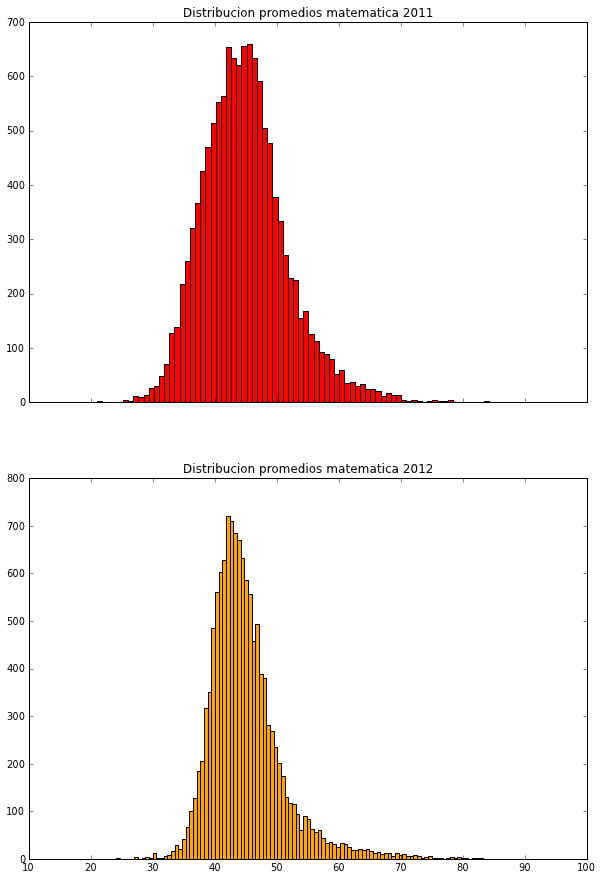

In [69]:
x = data2011.Matematica
y = data2012.Matematica

titulo_x = 'Distribucion promedios matematica 2011'
titulo_y = 'Distribucion promedios matematica 2012'

dos_graficos(x,y,titulo_x,titulo_y)

## El acantilado y la ladera

La diferencia en las distribuciones de puntajes entre los colegios públicos y privados 
ilustra a la perfección la desigualdad inherente al sistema educativo. Aunque los promedios
de las distribuciones son cercanos (con una ligera ventaja para los privados), el sesgo hacia la derecha de los colegios privados es 
más alto que el de los públicos. 

Esto sugiere que aunque en general los públicos y los privados sean igualmente regulares (promedios de cuarenta y algo sobre cien), 
dentro de los privados hay una cola gruesa de colegios con resultados mucho mejores que los
de cualquier colegio público. 

In [54]:
publicos2011 = data2011[data2011.Oficial =='SI']
privados2011 = data2011[data2011.Oficial =='NO']

publicos2012 = data2012[data2012.Oficial =='SI']
privados2012 = data2012[data2012.Oficial =='NO']

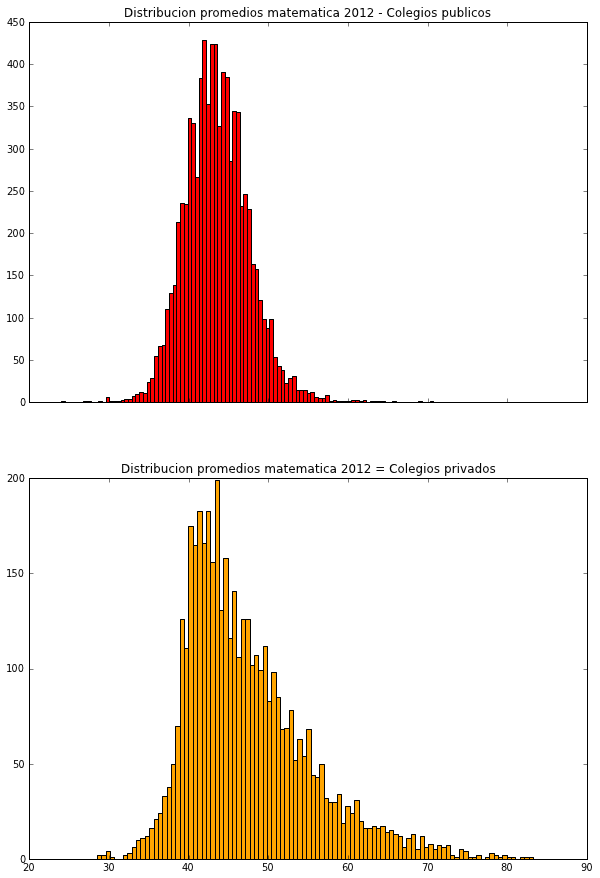

In [55]:
x = publicos2012.Matematica
y = privados2012.Matematica

titulo_x = 'Distribucion promedios matematica 2012 - Colegios publicos'
titulo_y = 'Distribucion promedios matematica 2012 - Colegios privados'

dos_graficos(x,y,titulo_x,titulo_y)

In [65]:
print "Sesgo en públicos: ", publicos2012.Matematica.skew()
print "Sesgo en privados: ", privados2012.Matematica.skew()

print "Promedio en públicos: ", publicos2012.Matematica.mean()
print "Promedio en privados: ", privados2012.Matematica.mean()

print "Mediana en públicos: ", publicos2012.Matematica.median()
print "Mediana en privados: ", privados2012.Matematica.median()

Sesgo en públicos:  0.513152819792
Sesgo en privados:  1.10905758369
Promedio en públicos:  43.5846841332
Promedio en privados:  47.3824865108
Mediana en públicos:  43.4
Mediana en privados:  45.7

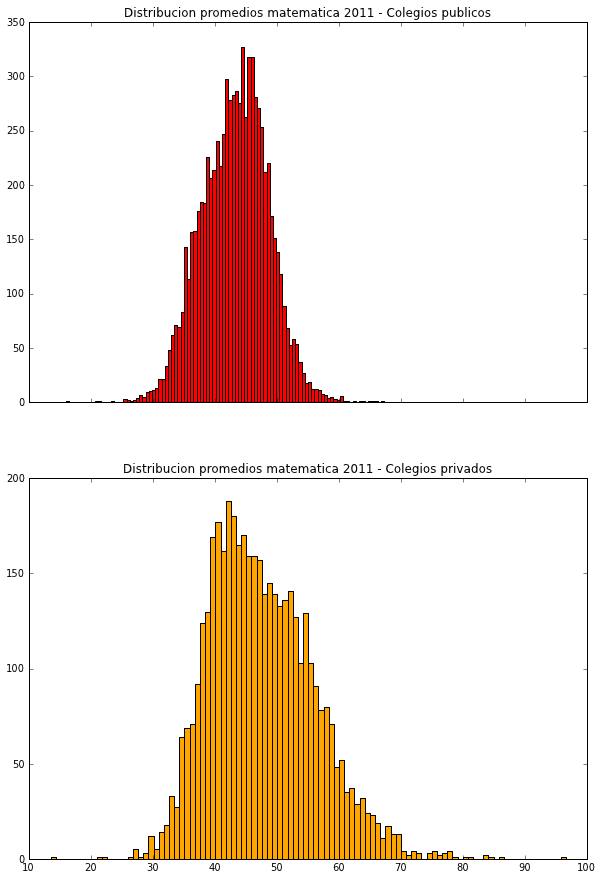

In [62]:
x = publicos2011.Matematica
y = privados2011.Matematica

titulo_x = 'Distribucion promedios matematica 2011 - Colegios publicos'
titulo_y = 'Distribucion promedios matematica 2011 - Colegios privados'

dos_graficos(x,y,titulo_x,titulo_y)

In [64]:
print "Sesgo en públicos: ", publicos2011.Matematica.skew()
print "Sesgo en privados: ", privados2011.Matematica.skew()

print "Promedio en públicos: ", publicos2011.Matematica.mean()
print "Promedio en privados: ", privados2011.Matematica.mean()

print "Mediana en públicos: ", publicos2011.Matematica.median()
print "Mediana en privados: ", privados2011.Matematica.median()

Sesgo en públicos:  -0.052012984336
Sesgo en privados:  0.574996008708
Promedio en públicos:  43.2461475202
Promedio en privados:  47.5885674994
Mediana en públicos:  43.49
Mediana en privados:  46.64

## Y claro, no es sólo en matemática

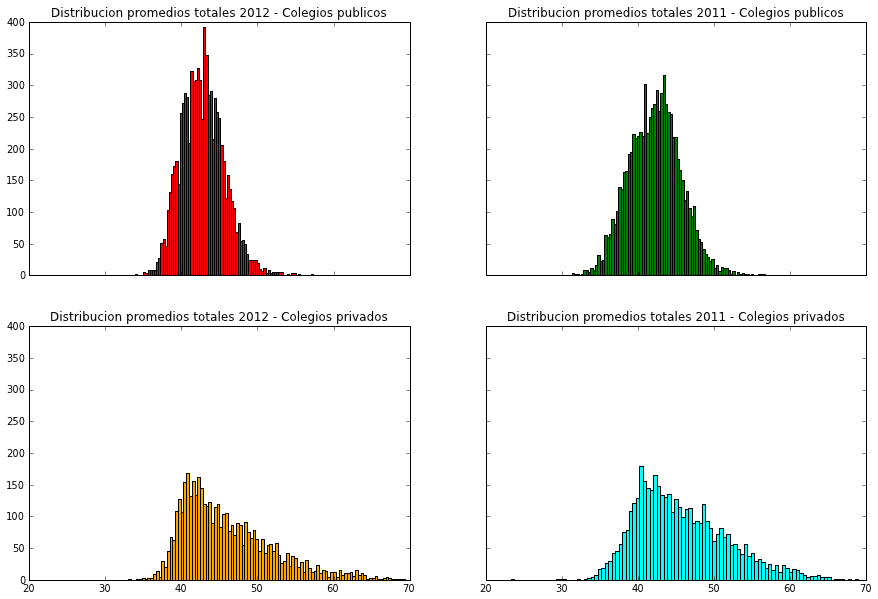

In [75]:
x2012 = publicos2012.Promedio_Total
y2012 = privados2012.Promedio_Total

titulo_x2012 = 'Distribucion promedios totales 2012 - Colegios publicos'
titulo_y2012 = 'Distribucion promedios totales 2012 - Colegios privados'

x2011 = publicos2011.Promedio_Total
y2011 = privados2011.Promedio_Total

titulo_x2011 = 'Distribucion promedios totales 2011 - Colegios publicos'
titulo_y2011 = 'Distribucion promedios totales 2011 - Colegios privados'

f, axarr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,10), dpi=100)
axarr[0, 0].hist(x2012, bins=100, color='red')
axarr[0, 0].set_title(titulo_x2012)
axarr[1, 0].hist(y2012, bins=100, color='orange')
axarr[1, 0].set_title(titulo_y2012)
axarr[0, 1].hist(x2011, bins=100, color='green')
axarr[0, 1].set_title(titulo_x2011)
axarr[1, 1].hist(y2011, bins=100, color='cyan')
axarr[1, 1].set_title(titulo_y2011)
plt.show()

In [76]:
print "Sesgo en públicos 2012: ", publicos2012.Promedio_Total.skew()
print "Sesgo en privados 2012: ", privados2012.Promedio_Total.skew()

print "Promedio en públicos 2012: ", publicos2012.Promedio_Total.mean()
print "Promedio en privados 2012: ", privados2012.Promedio_Total.mean()

print "Mediana en públicos 2012: ", publicos2012.Promedio_Total.median()
print "Mediana en privados 2012: ", privados2012.Promedio_Total.median()

print "Sesgo en públicos 2011: ", publicos2011.Promedio_Total.skew()
print "Sesgo en privados 2011: ", privados2011.Promedio_Total.skew()

print "Promedio en públicos 2011: ", publicos2011.Promedio_Total.mean()
print "Promedio en privados 2011: ", privados2011.Promedio_Total.mean()

print "Mediana en públicos 2011: ", publicos2011.Promedio_Total.median()
print "Mediana en privados 2011: ", privados2011.Promedio_Total.median()

Sesgo en públicos 2012:  0.526599249105
Sesgo en privados 2012:  1.02662898427
Promedio en públicos 2012:  42.8033300686
Promedio en privados 2012:  46.0227293165
Mediana en públicos 2012:  42.7
Mediana en privados 2012:  44.65
Sesgo en públicos 2011:  0.207080369486
Sesgo en privados 2011:  0.673856432328
Promedio en públicos 2011:  42.2170533907
Promedio en privados 2011:  45.6859889984
Mediana en públicos 2011:  42.26
Mediana en privados 2011:  44.65

## Todos los colegios son iguales, pero hay unos mejores que otros

Entre los puntajes de cada área hay correlaciones altas. Cuando un colegio obtiene resultados
altos (bajos) en un área, generalmente obtiene resultados altos (bajos) en todas las demás.

In [100]:
areas = ['Matematica', 'Lenguaje', 'Biologia', 'Fisica' ,'Ingles', 'Quimica']
puntajes2012 = data2012[areas]
puntajes2011 = data2011[areas]

In [101]:
puntajes2012.corr()

,Matematica,Lenguaje,Biologia,Fisica,Ingles,Quimica
Matematica,1.000000,0.851994,0.877380,0.832650,0.853915,0.881737
Lenguaje,0.851994,1.000000,0.871563,0.772343,0.851910,0.852104
Biologia,0.877380,0.871563,1.000000,0.805226,0.834049,0.890977
Fisica,0.832650,0.772343,0.805226,1.000000,0.825350,0.839733
Ingles,0.853915,0.851910,0.834049,0.825350,1.000000,0.834422
Quimica,0.881737,0.852104,0.890977,0.839733,0.834422,1.000000


In [103]:
puntajes2011.corr()

,Matematica,Lenguaje,Biologia,Fisica,Ingles,Quimica
Matematica,1.000000,0.867654,0.869163,0.850349,0.734763,0.872090
Lenguaje,0.867654,1.000000,0.856485,0.760507,0.665898,0.785545
Biologia,0.869163,0.856485,1.000000,0.795072,0.687669,0.807628
Fisica,0.850349,0.760507,0.795072,1.000000,0.655000,0.808700
Ingles,0.734763,0.665898,0.687669,0.655000,1.000000,0.695131
Quimica,0.872090,0.785545,0.807628,0.808700,0.695131,1.000000


## Pero las áreas sí miden cosas distintas (o algo así)

Usemos una [prueba t con muestras dependientes](http://en.wikipedia.org/wiki/T-test#Dependent_t-test_for_paired_samples). La hipótesis nula es que los valores esperados de las distribuciones son iguales. 

In [105]:
print 'Matemática versus Lenguaje 2012:'
print 'Promedio Matemática:', puntajes2012.Matematica.mean()
print 'Promedio Lenguaje:', puntajes2012.Lenguaje.mean()
t_val, p_val = stats.ttest_rel(puntajes2012.Matematica,puntajes2012.Lenguaje)
print "Estadística t: {0:8.6f}. Valor de p: {1:8.6f}".format(t_val, p_val)

Matemática versus Lenguaje 2012:
Promedio Matemática: 44.9236683576
Promedio Lenguaje: 45.8776395054
Estadística t: -33.282382. Valor de p: 0.000000

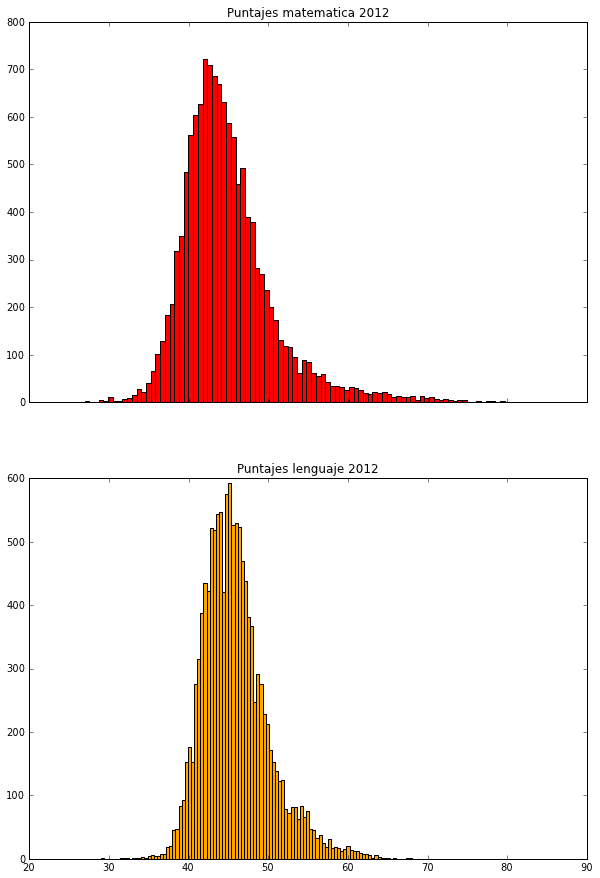

In [108]:
x = puntajes2012.Matematica
y = puntajes2012.Lenguaje

titulo_x = 'Puntajes matematica 2012'
titulo_y = 'Puntajes lenguaje 2012'

dos_graficos(x,y,titulo_x,titulo_y)

In [107]:
print 'Matemática versus Física 2012:'
print 'Promedio Matemática:', puntajes2012.Matematica.mean()
print 'Promedio Física:', puntajes2012.Fisica.mean()
t_val, p_val = stats.ttest_rel(puntajes2012.Matematica,puntajes2012.Fisica)
print "Estadística t: {0:8.6f}. Valor de p: {1:8.6f}".format(t_val, p_val)

Matemática versus Física 2012:
Promedio Matemática: 44.9236683576
Promedio Física: 44.0144023462
Estadística t: 29.726227. Valor de p: 0.000000

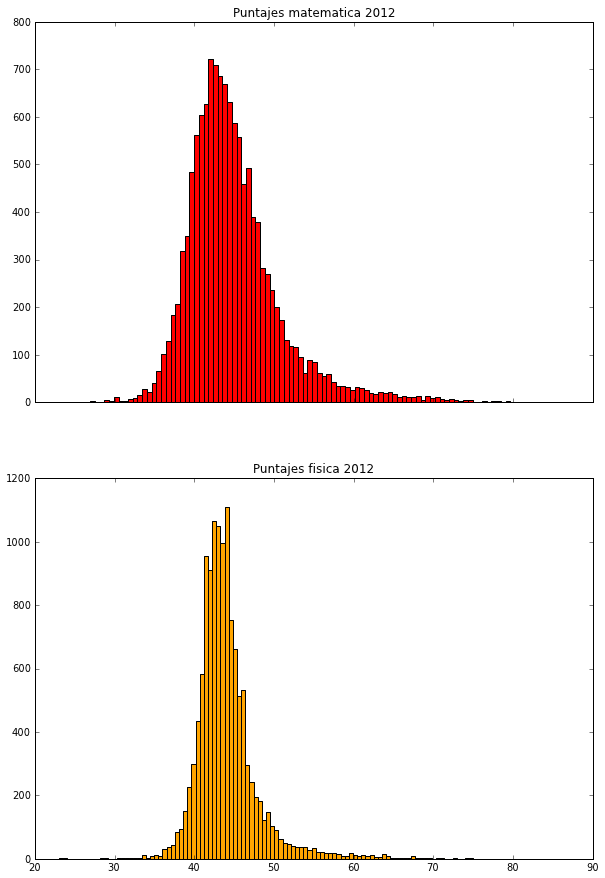

In [109]:
x = puntajes2012.Matematica
y = puntajes2012.Fisica

titulo_x = 'Puntajes matematica 2012'
titulo_y = 'Puntajes fisica 2012'

dos_graficos(x,y,titulo_x,titulo_y)

## ¿Progreso?

Para terminar, comparemos los puntajes promedios de los colegios en 2011 y 2012. 

Dado que el formato del nombre del colegio cambió en los archivos de 2011 a 2012,
primero debo intentar pegarlos identificando nombres de 2012 en la lista de 2011. 
La solución es burda pero la muestra que resulta es suficientemente grande. 

In [111]:
# Estas funciones permiten seleccionar un nombre de colegio de 2011 (sin abreviaturas) 
# para un nombre de colegio de 2012 (con abreviaturas). Es horriblemente lento. 
# Se aceptan sugerencias de soluciones más dignas a este problema.


def simplificador(x):
    return set(a for a in x.split() if a[-1] != ".")

def listacandidatos(x):
    return [t for t in data2011.Colegio if simplificador(x).issubset(set(t.split()))]

def candidato(x):
    if not re.search(r'\.', x):
        return x
    elif len(listacandidatos(x))==1:
        return listacandidatos(x)[0]
    else: 
        return np.nan

In [112]:
data2012['Nombre_sin_abreviaturas'] = data2012.Colegio.map(candidato)

In [119]:
print "Número total de colegios en 2012: ", len(data2012.Colegio)
print "Número de colegios con nombre completo identificado: ", len(data2012.Nombre_sin_abreviaturas.dropna())

Número total de colegios en 2012:  12616
Número de colegios con nombre completo identificado:  8972

In [124]:
# Ahora peguemos las dos DataFrames usando los nombres de la columna nueva en 2012

datoscombinados = pd.merge(data2011, 
                          data2012, 
                          left_on='Colegio', 
                          right_on='Nombre_sin_abreviaturas')

In [125]:
# El DataFrame resultante:

datoscombinados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7760 entries, 0 to 7759
Data columns:
Puesto_x                   7760  non-null values
Colegio_x                  7760  non-null values
Municipio_x                7760  non-null values
Departamento_x             7760  non-null values
Oficial_x                  7760  non-null values
Periodo                    7760  non-null values
Jornada_x                  7760  non-null values
Calendario_x               7760  non-null values
Evaluados_x                7760  non-null values
Promedio_Total_x           7760  non-null values
Matematica_x               7760  non-null values
Quimica_x                  7760  non-null values
Fisica_x                   7760  non-null values
Biologia_x                 7760  non-null values
Filosofia_x                7760  non-null values
Ingles_x                   7759  non-null values
Lenguaje_x                 7760  non-null values
Sociales_x                 7760  non-null values
DE_Matematica_x            776

In [126]:
# Número de colegios:

len(datoscombinados.Colegio_x)

7760

In [127]:
# Ahorxa creemos una columna donde se reste el promedio de 2012 menos
# el promedio de 2011 y grafiquemos la distribución.

datoscombinados['Resta_de_promedios'] = datoscombinados.Promedio_Total_y - datoscombinados.Promedio_Total_x

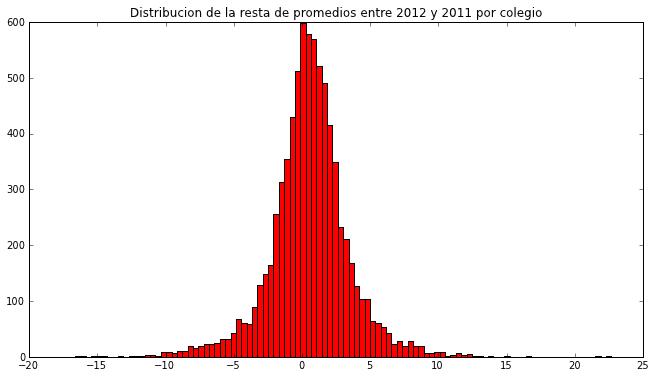

In [138]:
x = datoscombinados.Resta_de_promedios
titulo_x = 'Distribucion de la resta de promedios entre 2012 y 2011 por colegio'

fig = plt.figure(figsize=(11,6), dpi=100)
ax = fig.add_subplot(1,1,1)
ax.hist(x, bins=100, color='red')
ax.set_title(titulo_x)

In [140]:
print "Promedio: ", datoscombinados.Resta_de_promedios.mean()
print "Mediana: ", datoscombinados.Resta_de_promedios.median()
print "Desviación estándar: ", datoscombinados.Resta_de_promedios.std()

Promedio:  0.536192010309
Mediana:  0.555
Desviación estándar:  2.92110044054